# COMP-377 Lab Assignment 1
## Data Understanding, Preparation, and Evaluation
**Student Name:** _Maria Ivy Guese_  
**Date:** _2025-06-09_

## Exercise 1: Data Understanding & EDA
- Load the dataset using pandas.read_csv()  
Tip: If using the UCI version, use sep=';' when loading.  
- Print column names, first 10 rows, and dataset shape
- Use df.describe() and df.dtypes to inspect structure and variable types
- Plot a histogram of a numeric column (e.g., G3 – final grade) using matplotlib.pyplot.hist() or seaborn.histplot()


In [77]:
import pandas as pd

# Use the correct relative path
df = pd.read_csv('../data/student-mat.csv', sep=';')

In [78]:
# Print column names
print("Column names:")
print(df.columns)

# Print first 10 rows
print("\nFirst 10 rows:")
print(df.head(10))

# Print dataset shape
print("\nDataset shape:")
print(df.shape)


Column names:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

First 10 rows:
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     

In [79]:
# Descriptive statistics for numeric columns
print("\nDescriptive statistics:")
print(df.describe())

# Data types of each column
print("\nData types:")
print(df.dtypes)



Descriptive statistics:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
st

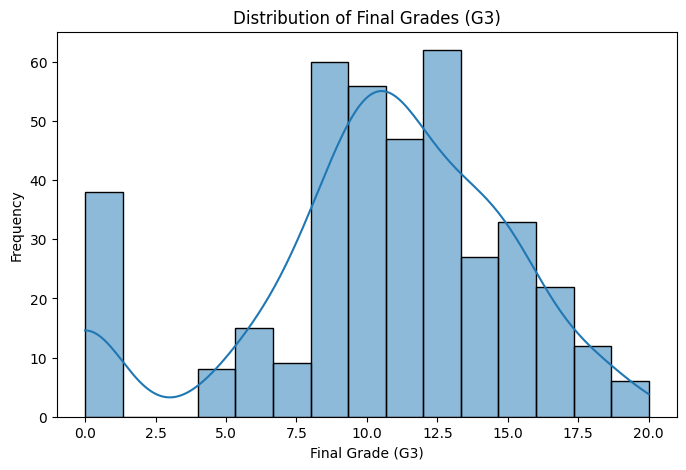

In [80]:

import matplotlib.pyplot as plt
import seaborn as sns # type: ignore

# Plot histogram for the 'G3' column (final grade)
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=15, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

## Exercise 2: Feature Selection & Justification
- Choose 5–6 features you believe are important to predict student success (e.g., G3, absences, failures)
- Explain your reasoning briefly in a Markdown cell  
Tip: You may use domain knowledge or correlation values  
- Optionally visualize a correlation matrix using seaborn.heatmap(df.corr(numeric_only=True))
- You may define a binary label column, e.g.,  
df["pass"] = (df["G3"] >= 10).astype(int)


📝 **Justification:**
  
Below are five features chosen from the dataset that are likely important for predicting student success, along with brief justifications:

- **G1 (First Period Grade):**  
Early academic performance is often a strong indicator of final outcomes. Students who perform well in the first grading period are more likely to succeed by the end of the course.

- **G2 (Second Period Grade):**  
Like G1, the second period grade reflects ongoing academic achievement and is highly correlated with the final grade (G3), making it a key predictor.

- **failures (Number of Past Class Failures):**  
A student’s history of failures can signal academic struggles and is typically negatively correlated with final success.

- **absences (Number of School Absences):**    
High absenteeism often leads to lower performance, as students miss important instruction and assessments.

- **studytime (Weekly Study Time):**  
More time spent studying generally correlates with better academic results, reflecting a student's commitment and work ethic.

- **schoolsup (Extra Educational Support):**  
Access to additional support can help struggling students improve their outcomes, making this a relevant feature for predicting success.



**Visualizing Feature Correlations (Optional)**

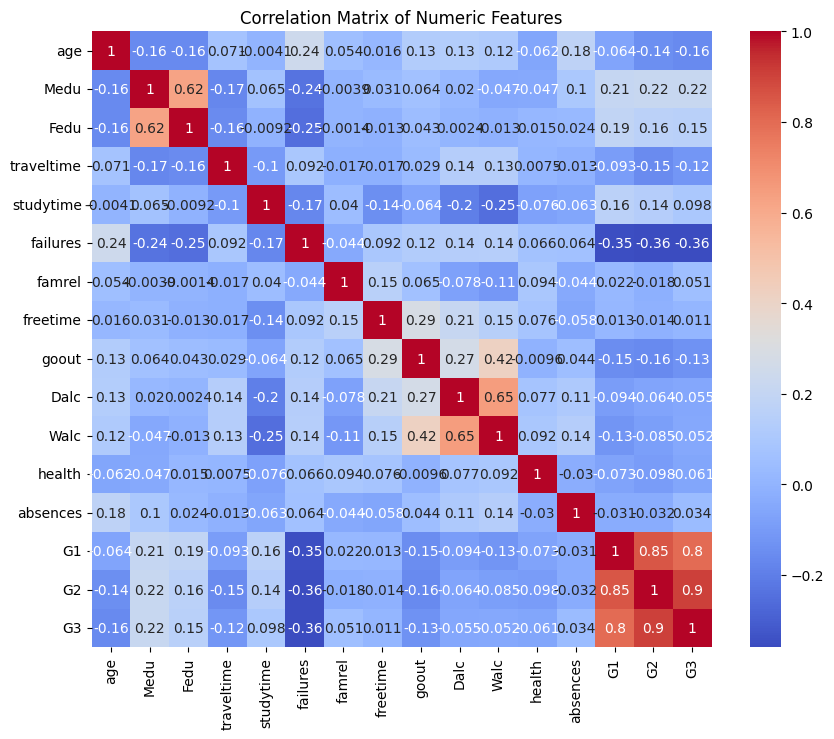

In [81]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


**Defining a Binary Label**

In [82]:
df["pass"] = (df["G3"] >= 10).astype(int)

## Exercise 3: Data Preprocessing
- Use df.isnull().sum() to confirm there are no missing values in this dataset. Then, create a small synthetic DataFrame with missing values to demonstrate how to handle missing data using SimpleImputer() or df.dropna().
- Encode categorical columns using pd.get_dummies() or OneHotEncoder() from sklearn.preprocessing
- Normalize numerical features with MinMaxScaler()
- Use train_test_split() from sklearn.model_selection to divide the data

In [83]:
# Check for missing values in the main dataset
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
pass          0
dtype: int64


In [84]:
# Demonstrate handling missing data with a synthetic example

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Create a small DataFrame with missing values
synthetic_df = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': ['x', np.nan, 'y', 'z']
})

print("Original synthetic DataFrame with missing values:")
print(synthetic_df)

# Option 1: Impute numeric and categorical columns
imputer_num = SimpleImputer(strategy='mean')
synthetic_df['A'] = imputer_num.fit_transform(synthetic_df[['A']])

imputer_cat = SimpleImputer(strategy='most_frequent')
synthetic_df['B'] = imputer_cat.fit_transform(synthetic_df[['B']]).ravel()

print("\nAfter imputation:")
print(synthetic_df)

# Option 2: Alternatively, drop rows with missing values
synthetic_df2 = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': ['x', np.nan, 'y', 'z']
})
print("\nAfter dropping rows with missing values:")
print(synthetic_df2.dropna())


Original synthetic DataFrame with missing values:
     A    B
0  1.0    x
1  2.0  NaN
2  NaN    y
3  4.0    z

After imputation:
          A  B
0  1.000000  x
1  2.000000  x
2  2.333333  y
3  4.000000  z

After dropping rows with missing values:
     A  B
0  1.0  x
3  4.0  z


In [85]:
# Identify categorical columns in the main dataset
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [86]:
#Normalize numerical features with MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns (excluding the target variable if needed)
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
# If you have a target column (e.g., 'G3' or 'pass'), exclude it from scaling:
# numeric_cols = [col for col in numeric_cols if col not in ['G3', 'pass']]

scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [87]:
#Split the data with train_test_split

from sklearn.model_selection import train_test_split

# Example: if 'G3' is your target
X = df_encoded.drop(columns=['G3'])
y = df_encoded['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (316, 42)
Test shape: (79, 42)


**Data Preprocessing Summary:**
- Confirmed there are no missing values in the main dataset.
- Demonstrated handling missing data using both imputation and row removal on a synthetic example.
- Encoded categorical variables using one-hot encoding.
- Normalized numerical features with MinMaxScaler.
- Split the processed data into training and testing sets for machine learning.

## Exercise 4: Evaluation Metrics – Manual Implementation
- Define toy arrays:  
y_true = [1, 0, 1, 1]  
y_pred = [1, 0, 0, 1]  
- Write functions in Python to compute:  
o	Precision  
o	Recall  
o	F1-score  
Tip: Use zip() to iterate and count TP, FP, FN manually  
- Handle divide-by-zero safely (e.g., with a small epsilon)  
- Optionally compare your output with:  
from sklearn.metrics import classification_report  


In [88]:
# Define toy arrays
y_true = [1, 0, 1, 1]
y_pred = [1, 0, 0, 1]

In [89]:
# Implement Precision, Recall, and F1-score Functions
def precision_score(y_true, y_pred, epsilon=1e-10):
    tp = sum((yt == 1 and yp == 1) for yt, yp in zip(y_true, y_pred))
    fp = sum((yt == 0 and yp == 1) for yt, yp in zip(y_true, y_pred))
    return tp / (tp + fp + epsilon)

def recall_score(y_true, y_pred, epsilon=1e-10):
    tp = sum((yt == 1 and yp == 1) for yt, yp in zip(y_true, y_pred))
    fn = sum((yt == 1 and yp == 0) for yt, yp in zip(y_true, y_pred))
    return tp / (tp + fn + epsilon)

def f1_score(y_true, y_pred, epsilon=1e-10):
    p = precision_score(y_true, y_pred, epsilon)
    r = recall_score(y_true, y_pred, epsilon)
    return 2 * p * r / (p + r + epsilon)


In [90]:
# Compute and Display the Metrics

print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1-score:", f1_score(y_true, y_pred))


Precision: 0.99999999995
Recall: 0.6666666666444444
F1-score: 0.79999999992


In [91]:
# Compare With scikit-learn (Optional)

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

